In [18]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import restoration, color
from scipy.signal import convolve2d
from PIL import Image

In [19]:
def add_noise_gauss(image):
    # Gauss
    row, col, ch = image.shape
    mean = 0
    var = 0.5
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss * 30
    return noisy


def add_noise_poisson(image):
    # Poisson
    return np.random.poisson(image)


def to_array_image(image_name):
    full_image_name = './imgs/' + image_name + '.jpg'
    img = Image.open(full_image_name)
    img = np.asarray(img)
    return img

def convert_to_rgb(image):
    return Image.fromarray(np.uint8(image)).convert('RGB')

In [20]:
orig_img_name = "blood"
orig_img = to_array_image(orig_img_name)

gauss_im = add_noise_gauss(orig_img)
poisson_img = add_noise_poisson(orig_img)

<ipython-input-21-75e2d87d63ac>:10: UserWarning: Image dtype is not float. By default denoise_nl_means will assume you want to preserve the range of your image (preserve_range=True). In scikit-image 0.19 this behavior will change to preserve_range=False. To avoid this warning, explicitly specify the preserve_range parameter.
  denoised_poisson = restoration.denoise_nl_means(poisson_img, multichannel=True)


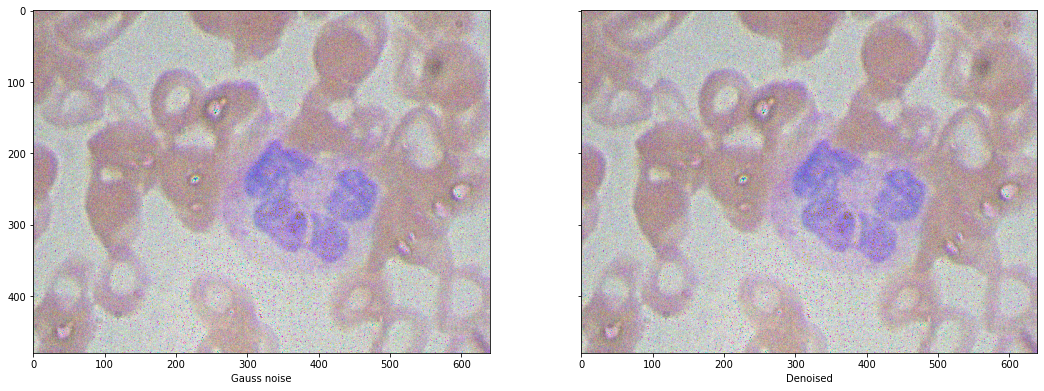

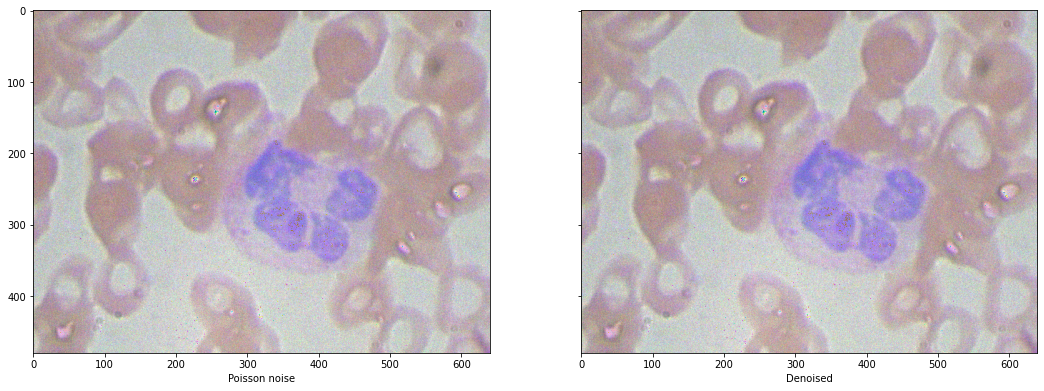

In [21]:
# non-local means
denoised_gauss = restoration.denoise_nl_means(gauss_im, multichannel=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 14),
                               sharex=True, sharey=True)
ax1.set_xlabel('Gauss noise')
ax1.imshow(convert_to_rgb(gauss_im))
ax2.set_xlabel('Denoised')
ax2.imshow(convert_to_rgb(denoised_gauss))

denoised_poisson = restoration.denoise_nl_means(poisson_img, multichannel=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 14),
                               sharex=True, sharey=True)
ax1.set_xlabel('Poisson noise')
ax1.imshow(convert_to_rgb(poisson_img))
ax2.set_xlabel('Denoised')
ax2.imshow(convert_to_rgb(denoised_poisson))

In [ ]:
# wiener
# gray_gauss = color.rgb2gray(gauss_im)
# psf = np.ones((5, 5)) / 25
# gray_gauss = convolve2d(gray_gauss, psf, 'same')
# gray_gauss += 0.1 * gray_gauss.std() * np.random.standard_normal(gray_gauss.shape)
# denoised_gauss = restoration.wiener(gray_gauss, psf, 1100)
# print(color.gray2rgb(gauss_im))
# utils.save_array_image(color.gray2rgb(gray_gauss), gauss_img_name + "_wiener")

# denoised_poisson = restoration.denoise_nl_means(poisson_img, multichannel=True)
# utils.save_array_image(denoised_gauss, poisson_img_name + "_wiener")


grayscale_image = img_as_float(data.camera()[::2, ::2])
image = color.gray2rgb(grayscale_image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)

In [ ]:
# median
# Bilateral
# BM3D
# wavelet
# denoise_tv_chambolle
# denoise_tv_bregman